# ER

In [1]:
from SubTempNet import *
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
#Create Temporal network
n = 100
p = 0.0001
t = 15000
name = "data/ER/ER_ud_n"+str(n)+"_p"+str(p)[2:]+"_T"+str(t) +".edges"
A = [nx.gnp_random_graph(n, p, seed=None, directed=False) for i in range(t)]
if len(A[0].edges()) ==0:
    u,v = np.random.choice(range(n),2,replace = False )
    A[0].add_edge(u,v)
if len(A[-1].edges()) ==0:
    u,v = np.random.choice(range(n),2,replace = False )
    A[-1].add_edge(u,v)
SubTempNet.write_snapshotlist_to_edgelist(A, name, separator='\t')

In [2]:
filepath ="data/ER/ER_ud_n100_p0001_T15000.edges"
objname = "ER_n100_p0001"
STN= SubTempNet(filepath,objname,directed= False, init = False)

[1, 1, 2, 3, 4, 5, 6, 7, 8, 10, 12, 14, 16, 19, 22, 26, 30, 35, 41, 48, 57, 66, 78, 91, 106, 124, 145, 169, 198, 231, 270, 316, 369, 432, 504, 589, 689, 805, 940, 1099, 1284, 1500, 1752, 2048]


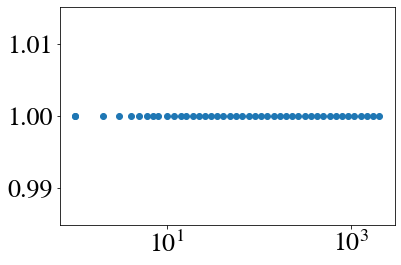

In [15]:
num = 50
T = sorted([1]+list(set(np.logspace(np.log10(2048),np.log10(1), num, dtype = int))))
print(T)
plt.scatter(T, len(T)*[1])
plt.xscale("log")

In [14]:
STN.run(*T,  maxsamp = 30, minsamp = 5)

Done with samplelengths  [1, 8, 9, 10, 11, 12, 14, 15, 17, 19, 22, 25, 28, 31, 35, 39, 44, 49, 55, 61, 69, 77, 86, 97, 108, 121, 136, 152, 170, 191, 214, 239, 268, 300, 336, 376, 421, 471, 528, 591, 662, 741, 829, 929, 1040, 1164, 1303, 1459, 1634, 1829]
Analyzing sample number 7 for samplelength  2048 and  8 slices


In [16]:
STN.save()

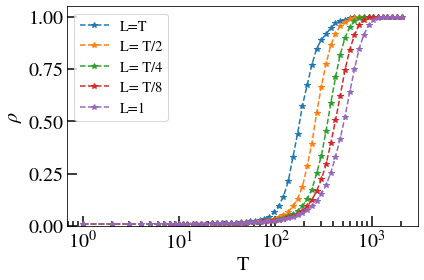

In [12]:
STN.plot_PA(normalize=True, LCC = False)


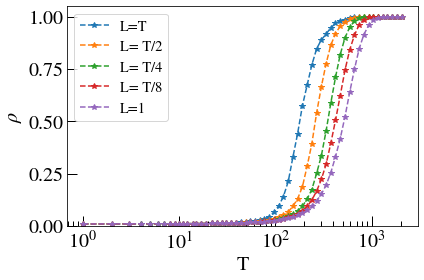

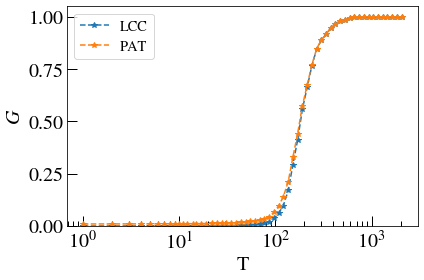

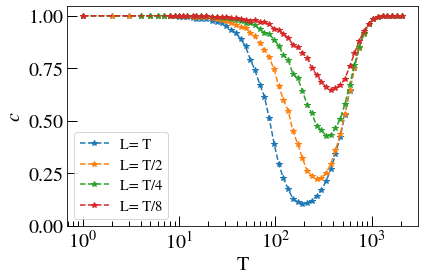

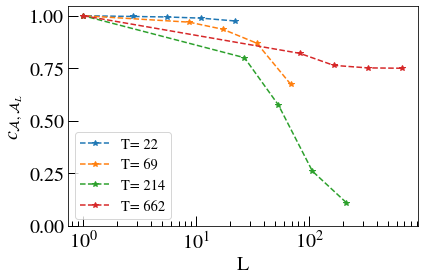

In [21]:
STN.plot_PA(normalize=True, LCC = False)
STN.plot_LCC(normalize=True, ACC = True)
STN.plot_cA0AT()

# LCC:

$\rho = \frac{PAT.nnz}{N^2}$

$G = (\frac{numnodes(LCC)}{N})^2$

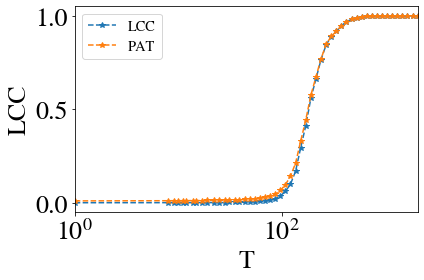

In [15]:
STN.plot_LCC(normalize=True, ACC = True)